# 1. Introduction

Name : Muhammad Erico Ricardo

Work from home is one of many methods of working, alongside work from an office. Work-from-home arrangements began to gain popularity in 2019, particularly during the COVID-19 pandemic. This approach was seen as a solution to curb the spread of the virus. However, not everyone is comfortable with this method of working. In this project, I will analyze a dataset about the impact of remote work on mental health. I will then create a classification model to help individuals understand how remote work might affect them based on their specific circumstances.

Data source is from kaggle : https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health

The project flow :
1. Data Cleaning
2. Data Processing
3. Data Clustering
4. Data Evaluations

# 2. Import Library

In [1]:
pip install PHIK

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import warnings
warnings.filterwarnings('ignore')
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
import matplotlib.cm as cm


# 3. Data Loading


In [5]:
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

this is data column meaning:
- Employee_ID: Unique identifier for each employee.
- Age: Age of the employee.
- Gender: Gender of the employee.
- Job_Role: Current role of the employee.
- Industry: Industry they work in.
- Work_Location: Whether they work remotely, hybrid, or onsite.
- Stress_Level: Their self-reported level of stress.
- Mental_Health_Condition: Any mental health condition reported (Anxiety, Depression, etc.).
- Social_Isolation_Rating: A self-reported rating (1-5) on how isolated they feel.
- Satisfaction_with_Remote_Work: How satisfied they are with remote work arrangements (Satisfied, Neutral, Unsatisfied).

In [6]:
data_original = data

In [7]:
# See data
data.iloc[:,:10]

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2
...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5


In [8]:
data.iloc[:,10:]

,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...
4995,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [10]:
# See data duplicate
data.duplicated().sum()

0

In [11]:
# See missing value inside data
data.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

There's missing value in Mental_Health_Condition Column, and Physical_Activity Column. Lets see what inside it.

In [12]:
# See Mental Health Condition data
data['Mental_Health_Condition'].unique()

array(['Depression', 'Anxiety', nan, 'Burnout'], dtype=object)

In [13]:
data.loc[data['Mental_Health_Condition'].isna()]

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
10,EMP0011,33,Non-binary,Software Engineer,Finance,17,Remote,48,3,3,High,NaN,Yes,Decrease,4,Satisfied,2,Weekly,Average,Oceania
11,EMP0012,47,Female,Marketing,Consulting,31,Hybrid,26,12,4,Medium,NaN,Yes,No Change,4,Neutral,3,Weekly,Poor,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,EMP4987,31,Prefer not to say,Sales,Manufacturing,5,Onsite,52,10,1,Low,NaN,No,No Change,1,Satisfied,2,Weekly,Good,Africa
4988,EMP4989,53,Prefer not to say,Sales,IT,21,Remote,26,0,5,Medium,NaN,No,Increase,3,Neutral,3,Weekly,Poor,Africa
4990,EMP4991,58,Prefer not to say,Project Manager,Consulting,10,Onsite,45,10,1,High,NaN,Yes,Increase,5,Unsatisfied,3,NaN,Poor,Africa
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia


There's no pattern why it missing value, so i categorize this missing value to Missing Completely At Random. It can be caused from problem when data insertion. So to handle it i can use a mode to fill it, why i use mode? because the missing data is more than 20% of the data.

In [14]:
# Phisical Activity data
data['Physical_Activity'].unique()

array(['Weekly', nan, 'Daily'], dtype=object)

In [15]:
data.loc[data['Physical_Activity'].isna()]

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
25,EMP0026,49,Male,Project Manager,Healthcare,23,Onsite,21,14,4,High,Burnout,No,No Change,4,Neutral,3,NaN,Good,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,EMP4984,39,Prefer not to say,Software Engineer,IT,11,Hybrid,50,10,3,Low,Anxiety,No,Decrease,2,Neutral,5,NaN,Good,Europe
4984,EMP4985,54,Non-binary,Designer,IT,8,Onsite,49,0,2,Medium,NaN,No,Decrease,4,Satisfied,3,NaN,Poor,Africa
4990,EMP4991,58,Prefer not to say,Project Manager,Consulting,10,Onsite,45,10,1,High,NaN,Yes,Increase,5,Unsatisfied,3,NaN,Poor,Africa
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa


After see the missing value data, i cant recognize pattern of missing data, so just like before we gonna use mode to fill missing value data.

# 4. Explanatory Data Analysis

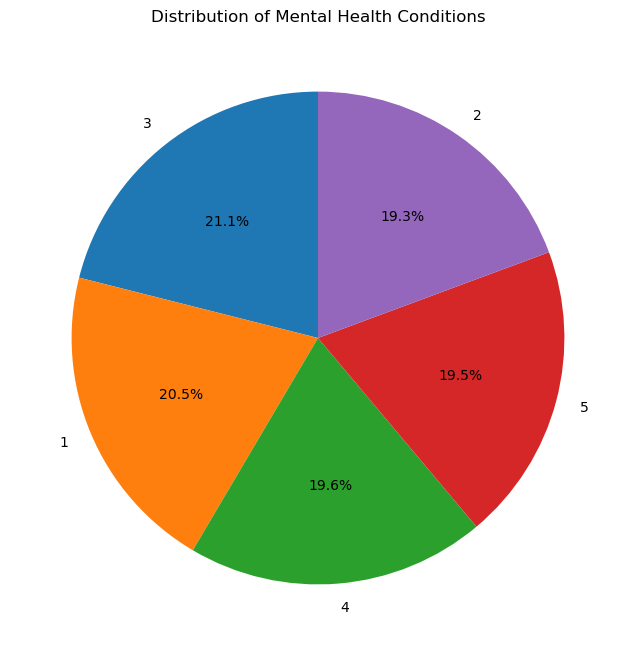

In [16]:
# prompt: create diagram about Mental_health_condition like pie chart

import matplotlib.pyplot as plt
# Create a pie chart of Mental_Health_Condition
mental_health_counts = data['Work_Life_Balance_Rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mental_health_counts, labels=mental_health_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Mental Health Conditions')
plt.show()


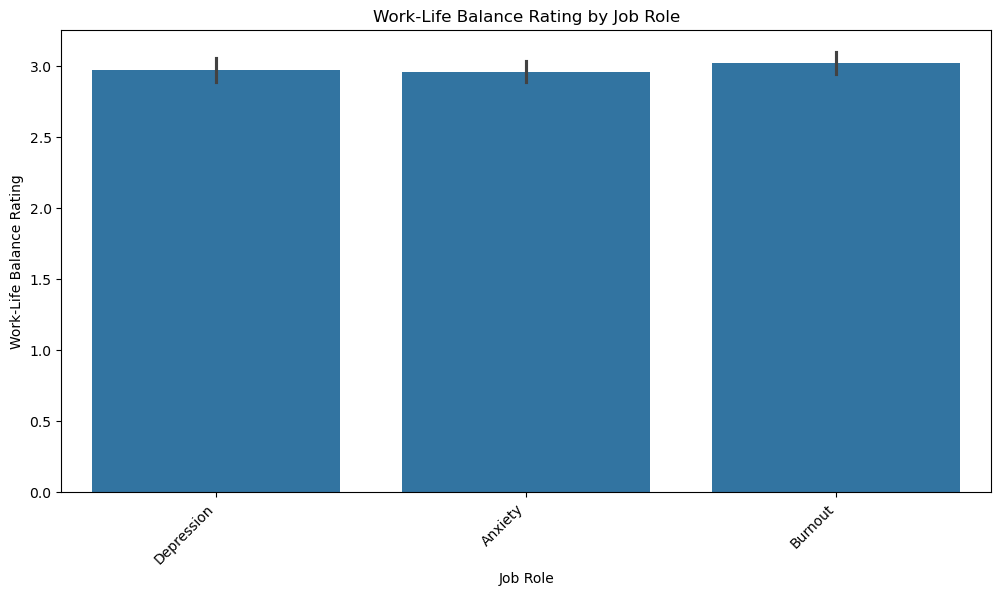

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mental_Health_Condition', y='Work_Life_Balance_Rating', data=data)
plt.title('Work-Life Balance Rating by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Work-Life Balance Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


# 5. Feature Engineering

In [18]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [19]:
data.nunique()

Employee_ID                          5000
Age                                    39
Gender                                  4
Job_Role                                7
Industry                                7
Years_of_Experience                    35
Work_Location                           3
Hours_Worked_Per_Week                  41
Number_of_Virtual_Meetings             16
Work_Life_Balance_Rating                5
Stress_Level                            3
Mental_Health_Condition                 3
Access_to_Mental_Health_Resources       2
Productivity_Change                     3
Social_Isolation_Rating                 5
Satisfaction_with_Remote_Work           3
Company_Support_for_Remote_Work         5
Physical_Activity                       2
Sleep_Quality                           3
Region                                  6
dtype: int64

In [20]:
Unique = ['Employee_ID']
Numerical_disrete = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings','Company_Support_for_Remote_Work']
Numerical_Bounded = ['Work_Life_Balance_Rating' ,'Social_Isolation_Rating']
Categorical_ordinal =['Stress_Level', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality','Productivity_Change']
Categorical_nominal = ['Gender','Job_Role','Industry','Work_Location','Mental_Health_Condition','Access_to_Mental_Health_Resources','Region']

## A. Missing Value Handling

do missing value handling with inpute mode from the column

In [21]:
data['Mental_Health_Condition'].fillna(data['Mental_Health_Condition'].mode()[0], inplace=True)
data['Physical_Activity'].fillna(data['Physical_Activity'].mode()[0], inplace=True)

## B. Outliers Handling

In [22]:
# Do outliers Handling for every numerical column
data_skew_extreme = []
data_skew = []
data_normal = []
Numerical = Numerical_disrete + Numerical_Bounded
for i in Numerical:
  if (data[i].skew() >= 1) or (data[i].skew() <= -1):
    data_skew_extreme.append(i)
  elif data[i].skew() >= 0.5 or data[i].skew() <= -5:
    data_skew.append(i)
  else:
    data_normal.append(i)
print(data_skew_extreme)
print(data_skew)
print(data_normal)

[]
[]
['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating']


While the data appears normally distributed, I'll apply capping to ensure a more standardized dataset.

In [23]:
normal_cap = Winsorizer(capping_method='gaussian',
                        fold = 3,
                        tail = 'both',
                        variables = data_normal)

## C. Scaling

In [24]:
num_normal_pipeline_1 = Pipeline([
    ('scaler', StandardScaler())
])
num_normal_pipeline_2 = Pipeline([
    ('scaler', MinMaxScaler())
])

In [25]:
data[Numerical_Bounded] = num_normal_pipeline_1.fit_transform(data[Numerical_Bounded])
data[Numerical_disrete] = num_normal_pipeline_2.fit_transform(data[Numerical_disrete])

## D. Encoding

In [26]:
for i in Categorical_ordinal:
  print(data[i].unique())

['Medium' 'High' 'Low']
['Unsatisfied' 'Satisfied' 'Neutral']
['Weekly' 'Daily']
['Good' 'Poor' 'Average']
['Decrease' 'Increase' 'No Change']


In [27]:
# Ordinal Encoding for Categorical Ordinal
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High'],['Unsatisfied','Neutral','Satisfied'],['Daily','Weekly'],['Poor','Average','Good'],['Decrease', 'No Change','Increase']])
data[Categorical_ordinal] = ordinal_encoder.fit_transform(data[Categorical_ordinal])
data

# One Hot Encoding for Categorical Nominal
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
data_encoded = onehot_encoder.fit_transform(data[Categorical_nominal])
data_encoded = pd.DataFrame(data_encoded, columns=onehot_encoder.get_feature_names_out(Categorical_nominal))
data = pd.concat([data, data_encoded], axis=1)
data.drop(Categorical_nominal, axis=1, inplace=True)


In [28]:
data

,Employee_ID,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,...,Work_Location_Onsite,Work_Location_Remote,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression,Access_to_Mental_Health_Resources_Yes,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,EMP0001,0.263158,0.352941,0.675,0.466667,-0.697830,1.0,0.0,-1.429785,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,EMP0002,0.473684,0.058824,0.800,0.266667,-1.406862,1.0,2.0,0.004446,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,EMP0003,0.973684,0.617647,0.650,0.733333,1.429268,1.0,1.0,0.721562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,EMP0004,0.131579,0.558824,0.300,0.533333,0.720235,2.0,2.0,0.004446,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,EMP0005,0.710526,0.911765,0.375,0.800000,-0.697830,2.0,0.0,0.004446,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,0.263158,0.088235,0.100,0.133333,1.429268,2.0,0.0,0.721562,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4996,EMP4997,0.447368,0.764706,0.700,1.000000,-1.406862,0.0,0.0,-1.429785,2.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4997,EMP4998,0.526316,0.588235,0.350,0.066667,0.720235,2.0,2.0,0.004446,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4998,EMP4999,0.131579,0.735294,0.950,0.000000,1.429268,0.0,2.0,0.004446,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# 6. PCA

In [29]:
data_non_unique = data.drop('Employee_ID', axis=1)

In [30]:
pca = PCA()
pca.fit_transform(data_non_unique)

array([[-0.61434712, -1.45666199, -0.32638578, ...,  0.083925  ,
         0.00959716,  0.07203475],
       [ 1.00354125, -1.10389568, -0.23550472, ...,  0.12296432,
        -0.32674805, -0.06063303],
       [-0.47465259,  1.63604304,  0.65584163, ...,  0.06532034,
         0.02784447,  0.05594397],
       ...,
       [-0.39708265,  0.59438711,  1.08779046, ...,  0.09087002,
         0.06455514,  0.07915887],
       [-1.04587184,  1.04137224,  0.21431548, ...,  0.09531107,
         0.0716102 ,  0.07693667],
       [ 0.87896748, -1.01276099,  0.09336713, ...,  0.06753573,
         0.03415516,  0.09858674]])

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

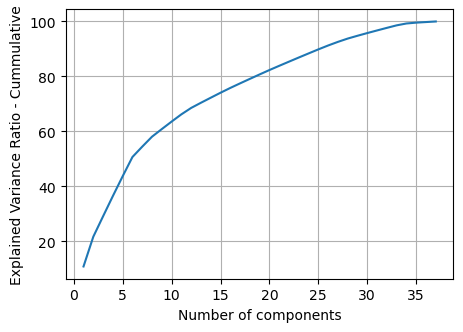

In [31]:
plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 38), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

from graph above, we can know recomendation of feature reduction is to 6 feature

In [32]:

pca = PCA(n_components=6, random_state=10)
pca.fit(data_non_unique)

data_scaled_pca = pca.transform(data_non_unique)

print('Number of components : ', pca.n_components_)

Number of components :  6


In [33]:

vif = pd.DataFrame()
vif["features"] = ['pca1','pca2','pca3','pca4','pca5','pca6']

vif["VIF"] = [variance_inflation_factor(data_scaled_pca, i) for i in range(data_scaled_pca.shape[1])]
print(vif)

  features  VIF
0     pca1  1.0
1     pca2  1.0
2     pca3  1.0
3     pca4  1.0
4     pca5  1.0
5     pca6  1.0


## 7. Clustering

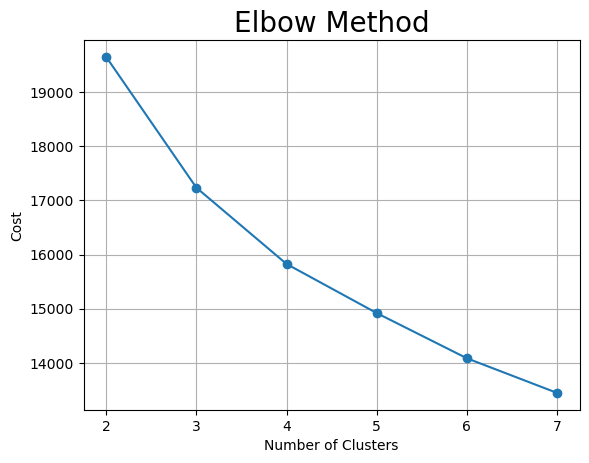

For n_clusters = 2 The average silhouette_score is : 0.15292032631133948
For n_clusters = 3 The average silhouette_score is : 0.14530528597105108
For n_clusters = 4 The average silhouette_score is : 0.13676190914319392
For n_clusters = 5 The average silhouette_score is : 0.13065154525182712
For n_clusters = 6 The average silhouette_score is : 0.1301549347232954
For n_clusters = 7 The average silhouette_score is : 0.12905337639880818


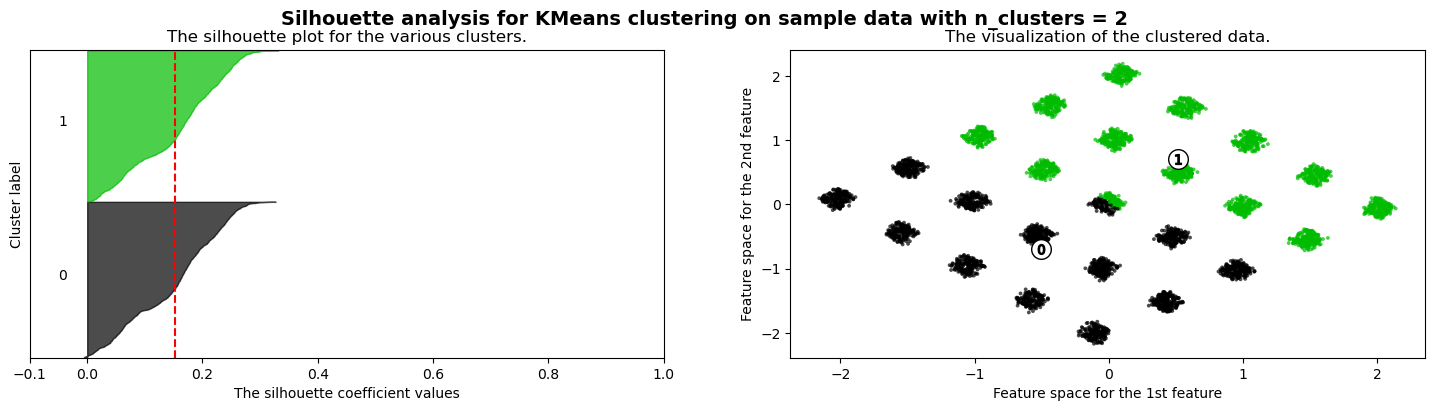

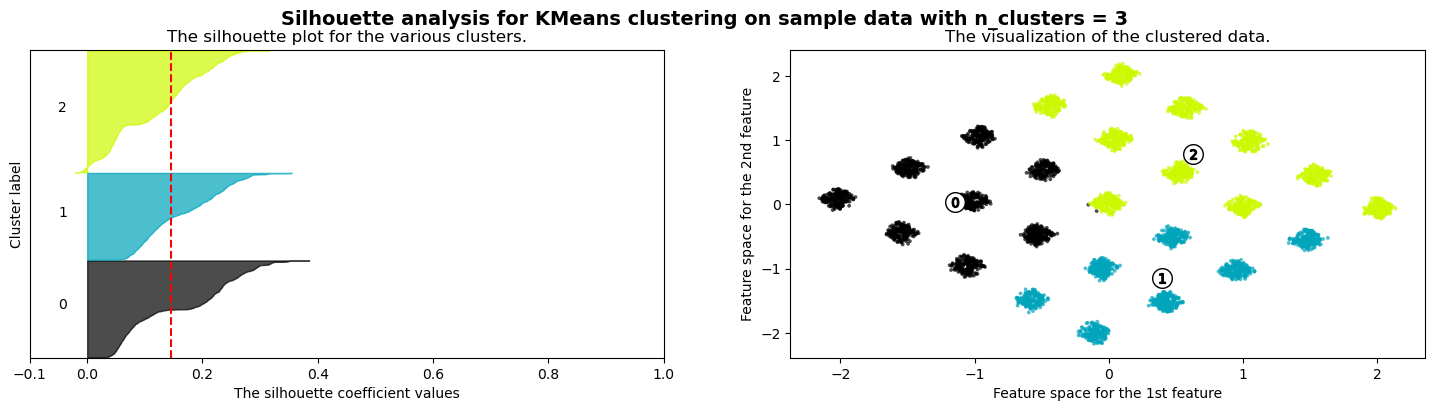

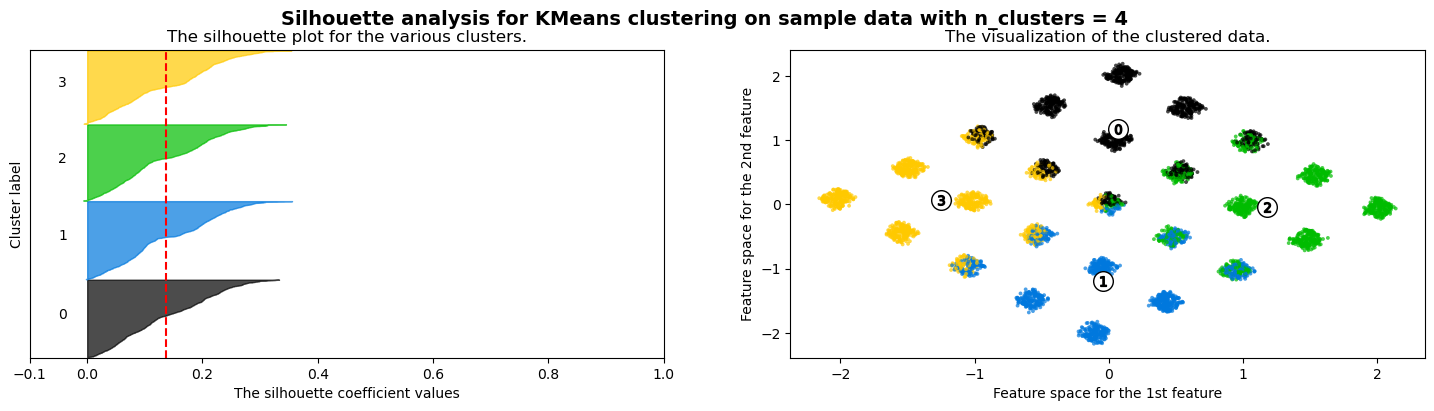

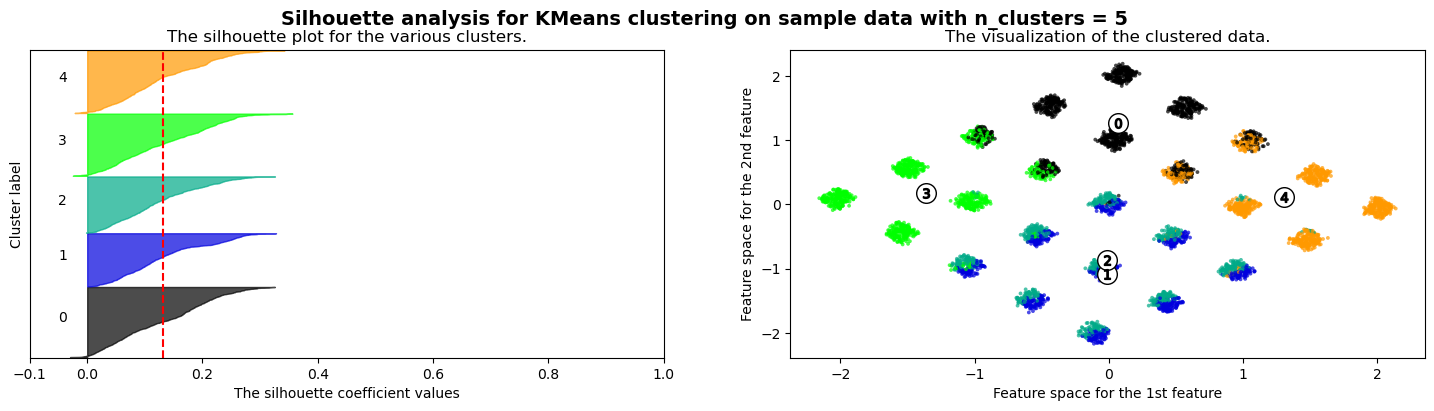

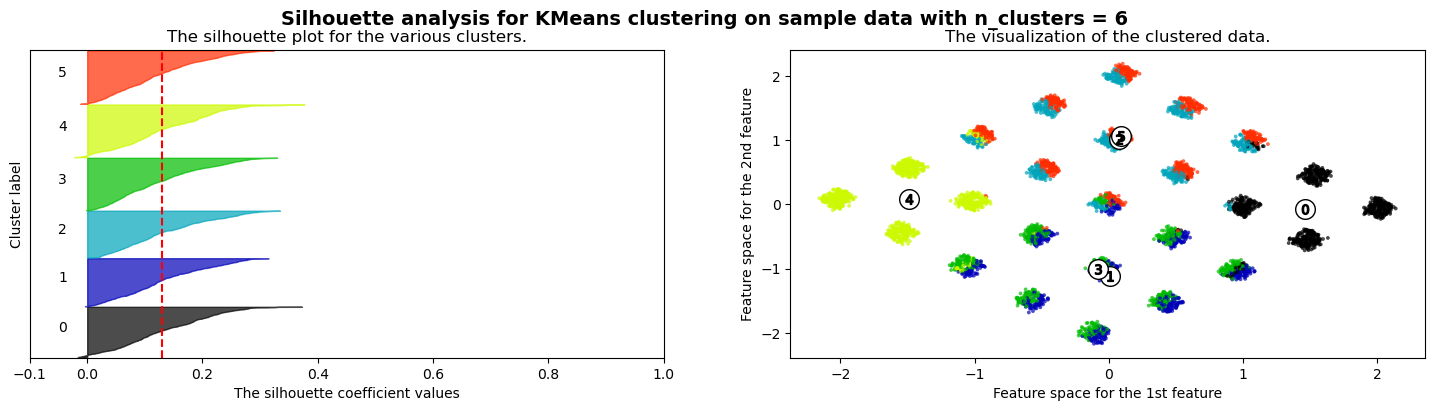

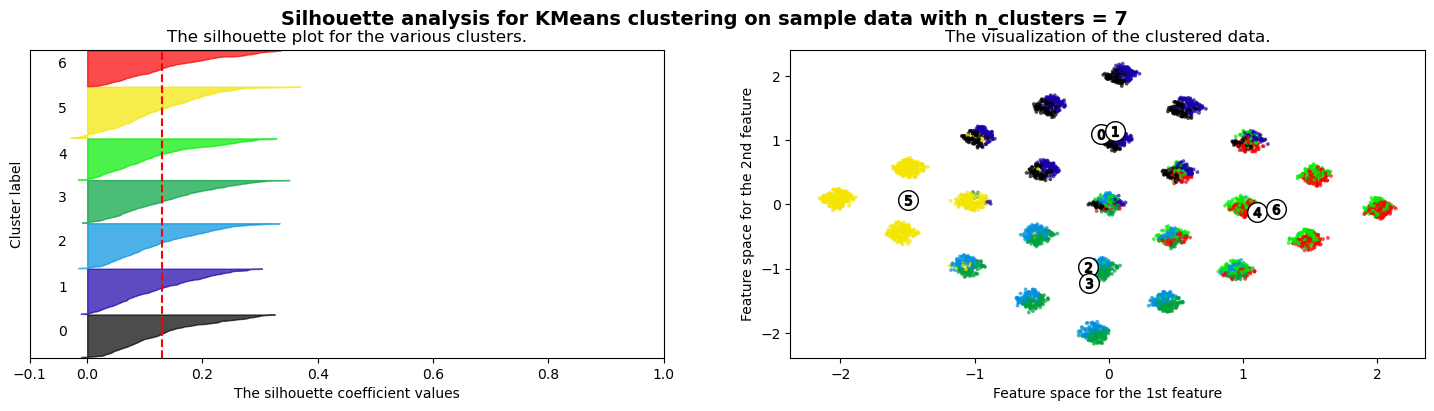

In [34]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        
        # Check if X has at least two columns
        if X.shape[1] >= 2:
            ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')
        else:
            print("X must have at least two columns for plotting.")

        # Use cluster_centers_
        centroids = clusterer.cluster_centers_
        
        if X.shape[1] >= 2:
            ax2.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(centroids):
                ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

wcss = []
random_state = 10
max_cluster = 7

# Assuming data_non_unique has shape (n_samples, n_features)
data_pca = data_scaled_pca

for i in range(2, max_cluster+1):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=random_state)
    km.fit(data_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss , marker="o")
plt.grid()
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

plot_silhouette(range(2, max_cluster+1), data_pca , random_state)

from the graph above we can see:
- In the elbow method, there is the most elbow in cluster 3
- when the number of clusters is 2, the highest silhouette score performance is 0.152
- when the number of clusters is 3, the highest silhouette score performance is 0.145
- in clustered data visualization, using 3 clusters is enough to divide the data evenly.

So, the recommended number of clusters for this dataset is 3.


## A. Model Definition

K-Means Clustering: Definition and How K-Means Works Clustering is one of the most popular unsupervised learning algorithms used in data clustering techniques. This algorithm aims to group data into k different groups (clusters) based on similarities in characteristics between data.

Advantages of K-Means Clustering Simple and Easy to Apply: The K-Means algorithm is relatively easy to understand and implement, both manually and using various programming libraries. Efficient for Big Data: K-Means can handle very large datasets quickly, especially when compared to other clustering algorithms. Stable Results: If centroid initialization is done properly, K-Means tends to produce stable and consistent results. Flexible: Can be used for various types of data, both numeric and categorical (with appropriate encoding techniques).

Disadvantages of K-Means Clustering Sensitive to Centroid Initialization: Clustering results are highly dependent on the selection of the initial centroid. Poor initialization can produce suboptimal results. Requires Determining the Value of k: The number of clusters (k) must be determined manually in advance. Determining the right value of k is very important, but often difficult. Assuming Spherical Data: K-Means tends to form clusters with a spherical or spherical shape. If the data has a more complex shape, K-Means may not be optimal. Sensitive to Outliers: Outliers can affect the position of the centroid and damage the clustering results.

## B. Model Training

In [35]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(data_scaled_pca)
pred

array([1, 1, 2, ..., 0, 0, 1])

In [36]:
data_original['Cluster'] = pred
data_non_unique['Cluster'] = pred

In [37]:
data_original

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Cluster
0,EMP0001,0.263158,Non-binary,HR,Healthcare,0.352941,Hybrid,0.675,0.466667,-0.697830,...,Depression,No,0.0,-1.429785,0.0,0.00,1.0,2.0,Europe,1
1,EMP0002,0.473684,Female,Data Scientist,IT,0.058824,Remote,0.800,0.266667,-1.406862,...,Anxiety,No,2.0,0.004446,2.0,0.25,1.0,2.0,Asia,1
2,EMP0003,0.973684,Non-binary,Software Engineer,Education,0.617647,Hybrid,0.650,0.733333,1.429268,...,Anxiety,No,1.0,0.721562,0.0,1.00,1.0,0.0,North America,2
3,EMP0004,0.131579,Male,Software Engineer,Finance,0.558824,Onsite,0.300,0.533333,0.720235,...,Depression,Yes,2.0,0.004446,0.0,0.50,1.0,0.0,Europe,0
4,EMP0005,0.710526,Male,Sales,Consulting,0.911765,Onsite,0.375,0.800000,-0.697830,...,Burnout,Yes,0.0,0.004446,0.0,0.50,1.0,1.0,North America,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,0.263158,Male,Sales,Consulting,0.088235,Onsite,0.100,0.133333,1.429268,...,Burnout,Yes,0.0,0.721562,1.0,0.00,1.0,1.0,Asia,2
4996,EMP4997,0.447368,Female,Sales,Healthcare,0.764706,Onsite,0.700,1.000000,-1.406862,...,Depression,Yes,0.0,-1.429785,2.0,0.00,1.0,1.0,Africa,1
4997,EMP4998,0.526316,Female,Sales,Healthcare,0.588235,Hybrid,0.350,0.066667,0.720235,...,Burnout,No,2.0,0.004446,2.0,0.00,0.0,0.0,Oceania,0
4998,EMP4999,0.131579,Female,Sales,Healthcare,0.735294,Remote,0.950,0.000000,1.429268,...,Burnout,Yes,2.0,0.004446,0.0,0.75,0.0,1.0,Asia,0


## C. Model Evaluation

In [38]:
data_original.phik_matrix()

interval columns not set, guessing: ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Stress_Level', 'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Cluster']


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Cluster
Employee_ID,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,1.0,1.000000,0.041899,0.000000,0.015761,0.067481,0.000000,0.052703,0.072503,0.000000,...,0.000000,0.026393,0.050883,0.000000,0.083937,0.027908,0.000000,0.000000,0.047826,0.003238
Gender,1.0,0.041899,1.000000,0.024966,0.007999,0.000000,0.025079,0.000000,0.029987,0.019433,...,0.010284,0.000000,0.000000,0.026749,0.015464,0.000000,0.062070,0.012600,0.000000,0.009281
Job_Role,1.0,0.000000,0.024966,1.000000,0.063681,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027752,0.000000,0.000000,0.011520,0.000000,0.018591,0.000000,0.000000,0.032426,0.000000
Industry,1.0,0.015761,0.007999,0.063681,1.000000,0.021150,0.000000,0.059690,0.027536,0.014576,...,0.016211,0.000000,0.000000,0.000000,0.000000,0.000000,0.022527,0.000000,0.000000,0.040481
Years_of_Experience,1.0,0.067481,0.000000,0.000000,0.021150,1.000000,0.033393,0.000000,0.000000,0.000000,...,0.004870,0.054846,0.000000,0.000000,0.000000,0.091211,0.000000,0.000000,0.000000,0.035636
Work_Location,1.0,0.000000,0.025079,0.000000,0.000000,0.033393,1.000000,0.039463,0.018760,0.002874,...,0.000000,0.000000,0.000000,0.000000,0.108461,0.022674,0.012587,0.000000,0.000000,0.000000
Hours_Worked_Per_Week,1.0,0.052703,0.000000,0.000000,0.059690,0.000000,0.039463,1.000000,0.085684,0.038923,...,0.045920,0.000000,0.000000,0.000000,0.007427,0.019549,0.057325,0.041924,0.036334,0.025909
Number_of_Virtual_Meetings,1.0,0.072503,0.029987,0.000000,0.027536,0.000000,0.018760,0.085684,1.000000,0.000000,...,0.031981,0.000000,0.036018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Work_Life_Balance_Rating,1.0,0.000000,0.019433,0.000000,0.014576,0.000000,0.002874,0.038923,0.000000,1.000000,...,0.004580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.636266


By imposing a minimum collinearity threshold of 10% on the cluster analysis, the resulting model incorporated only two significant variables: Social_Isolation_Rating and Work_Life_Balance_Rating. Consequently, the clusters effectively capture the degree to which individuals achieve work-life balance and the extent of their social engagement.

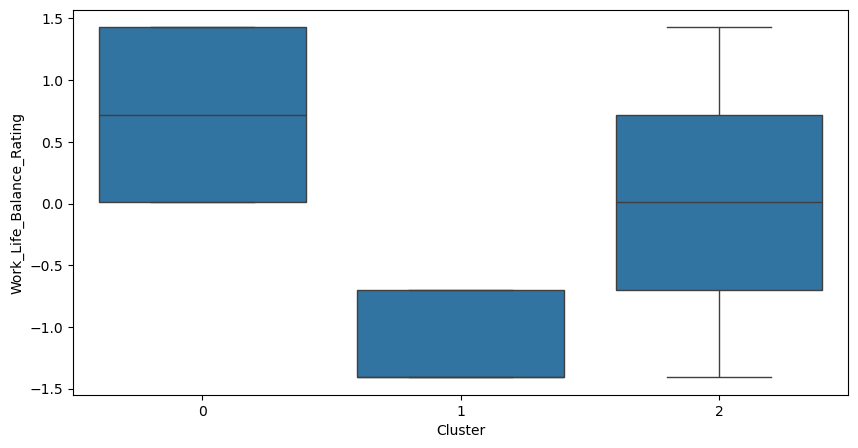

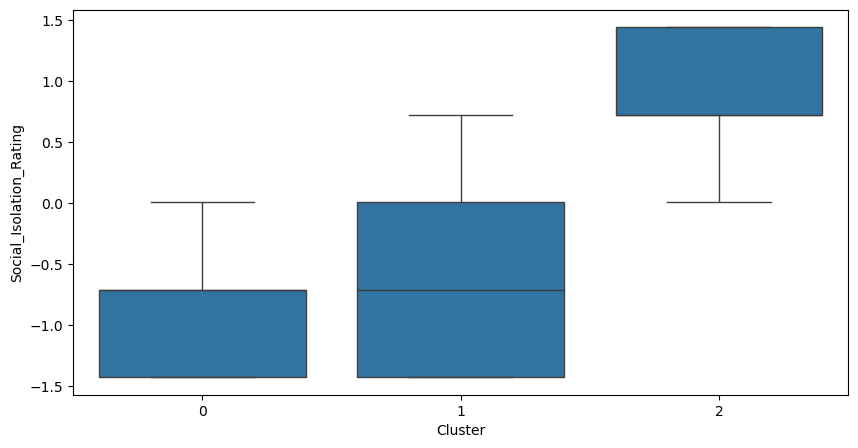

In [39]:
karakteristik = ['Work_Life_Balance_Rating','Social_Isolation_Rating']
# membuat visualisasi untuk melihat distribusi data pada setiap kolom terhadap cluster
for i in karakteristik:
  plt.figure(figsize=(10,5))
  sns.boxplot(x='Cluster', y=i, data=data_original)
  plt.show()

**"Interpretation within the WFH Context:**

* **Cluster 0:** Individuals in this cluster have likely successfully adapted to remote work and have found ways to maintain a healthy work-life balance. They may have developed effective time management strategies, created a conducive home workspace, or established clear boundaries between work and personal life.
* **Cluster 2:** While individuals in this cluster may have strong social networks or have found ways to stay connected with others during remote work, they may still be experiencing challenges in balancing their work and personal lives. This could be due to factors such as increased workloads, blurred boundaries, or difficulties in disconnecting from work.
* **Cluster 1:** Individuals in this cluster appear to be struggling significantly with the transition to remote work, both in terms of job performance and social well-being. They may be experiencing feelings of isolation, decreased motivation, or difficulties in managing their workload. These individuals may benefit from additional support, such as training in remote work skills, mental health resources, or opportunities to connect with colleagues."


In [40]:
for index, row in data_original.iterrows():
    if row['Cluster'] == 0:
        data_original.loc[index, 'Cluster'] = 'Balanced'
    elif row['Cluster'] == 2:
        data_original.loc[index, 'Cluster'] = 'Social but Stressed'
    else:
        data_original.loc[index, 'Cluster'] = 'Isolated and Stressed'

In [41]:
data_original

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Cluster
0,EMP0001,0.263158,Non-binary,HR,Healthcare,0.352941,Hybrid,0.675,0.466667,-0.697830,...,Depression,No,0.0,-1.429785,0.0,0.00,1.0,2.0,Europe,Isolated and Stressed
1,EMP0002,0.473684,Female,Data Scientist,IT,0.058824,Remote,0.800,0.266667,-1.406862,...,Anxiety,No,2.0,0.004446,2.0,0.25,1.0,2.0,Asia,Isolated and Stressed
2,EMP0003,0.973684,Non-binary,Software Engineer,Education,0.617647,Hybrid,0.650,0.733333,1.429268,...,Anxiety,No,1.0,0.721562,0.0,1.00,1.0,0.0,North America,Social but Stressed
3,EMP0004,0.131579,Male,Software Engineer,Finance,0.558824,Onsite,0.300,0.533333,0.720235,...,Depression,Yes,2.0,0.004446,0.0,0.50,1.0,0.0,Europe,Balanced
4,EMP0005,0.710526,Male,Sales,Consulting,0.911765,Onsite,0.375,0.800000,-0.697830,...,Burnout,Yes,0.0,0.004446,0.0,0.50,1.0,1.0,North America,Isolated and Stressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,0.263158,Male,Sales,Consulting,0.088235,Onsite,0.100,0.133333,1.429268,...,Burnout,Yes,0.0,0.721562,1.0,0.00,1.0,1.0,Asia,Social but Stressed
4996,EMP4997,0.447368,Female,Sales,Healthcare,0.764706,Onsite,0.700,1.000000,-1.406862,...,Depression,Yes,0.0,-1.429785,2.0,0.00,1.0,1.0,Africa,Isolated and Stressed
4997,EMP4998,0.526316,Female,Sales,Healthcare,0.588235,Hybrid,0.350,0.066667,0.720235,...,Burnout,No,2.0,0.004446,2.0,0.00,0.0,0.0,Oceania,Balanced
4998,EMP4999,0.131579,Female,Sales,Healthcare,0.735294,Remote,0.950,0.000000,1.429268,...,Burnout,Yes,2.0,0.004446,0.0,0.75,0.0,1.0,Asia,Balanced


### Model Strengths:

* **Computational efficiency:** K-Means is known for its speed, especially with large datasets. This allows the model to process data quickly and provide immediate results.
* **Ease of implementation:** The K-Means algorithm is straightforward to understand and implement, using either programming libraries or statistical software.
* **Intuitive results:** The resulting clusters from K-Means are generally easy to visualize and interpret, particularly for simple cases like dividing data into 3 clusters based on two variables.
* **Flexibility:** K-Means can be applied to various types of numerical data, making it versatile for different applications.

### Model Weaknesses:

* **Sensitivity to initialization:** The outcome of K-Means clustering is highly dependent on the initial choice of centroids. Different initializations can lead to different clustering results.
* **Data assumptions:** K-Means assumes that clusters have a tendency to be spherical and convex. If the data has more complex shapes, K-Means may not be optimal.
* **Fixed number of clusters:** The number of clusters (K) must be determined before the clustering process begins. Selecting the appropriate value of K often requires trial and error.
* **Outlier sensitivity:** K-Means is quite sensitive to outliers. Outliers can influence the position of centroids and distort the shape of clusters.

### Potential Improvements:

* **Exploring additional features:** Incorporating other relevant features, such as demographics, job type, or stress levels, can provide a more comprehensive understanding of the data and improve clustering accuracy.
* **Data preprocessing techniques:** Applying better data preprocessing techniques, like normalization or standardization, can enhance the performance of the K-Means algorithm.
* **Diverse evaluation metrics:** In addition to visualization, use evaluation metrics such as Silhouette Coefficient or Calinski-Harabasz Index to compare the performance of different clustering algorithms.
* **Comparison with other algorithms:** Compare the K-Means clustering results with other algorithms like DBSCAN, Hierarchical Clustering, or GMM to gain a broader perspective.

### Potential Developments:

* **In-depth cluster analysis:** After obtaining the clustering results, conduct a more in-depth analysis of the characteristics of each cluster. For example, identify unique patterns of behavior, preferences, or demographics for each cluster.
* **Application to business cases:** Apply the clustering model to address specific business questions. For instance, identify distinct customer segments for more targeted marketing.
* **Predictive model development:** Utilize the information from clustering to build predictive models, such as predicting employee satisfaction or turnover rates.
* **Integration with visualization techniques:** Employ more advanced visualization techniques, like t-SNE or UMAP, to visualize high-dimensional data and clustering results.

## Advice for Each Cluster

### Cluster 0: Adapted to Remote Work

* **Maintain and enhance strategies:** Continue to refine your time management techniques, home workspace setup, and work-life boundaries to sustain your current positive experiences. 
* **Share your methods:** Consider sharing your successful remote work strategies with colleagues who may be struggling. Your insights can be valuable to others.
* **Explore opportunities:** If you're finding remote work to be a good fit, explore opportunities for further professional development or career advancement within a remote or hybrid work environment.

### Cluster 2: Balancing Act

* **Set clear boundaries:** Establish specific routines and designated workspaces to separate work and personal time. This can help reduce stress and prevent burnout. 
* **Prioritize self-care:** Make time for activities that help you relax and recharge. Engage in hobbies, exercise, or spend quality time with loved ones.
* **Communicate effectively:** Maintain open communication with your manager and colleagues to ensure that your workload is manageable and that you have the support you need.

### Cluster 1: Struggling with Transition

* **Seek support:** Reach out to your manager, colleagues, or HR department for assistance. There may be resources available to help you adapt to remote work, such as training or counseling.
* **Build a routine:** Create a structured daily routine to help you stay organized and motivated. Include time for breaks, meals, and exercise.
* **Connect with others:** Participate in virtual team-building activities or online social groups to combat feelings of isolation.
* **Set realistic goals:** Break down your tasks into smaller, manageable steps to avoid feeling overwhelmed. Celebrate your achievements to boost your motivation.

**Remember:** Everyone's experience with remote work is unique. It may take time to find the strategies that work best for you. Be patient with yourself and seek support when needed.

